<a href="https://colab.research.google.com/github/Davron030901/Scikit_learning/blob/main/Naive_Bayes_Classifier_A_Practical_Tutorial_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

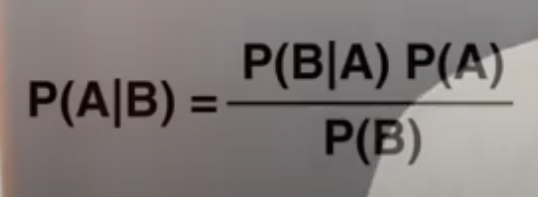

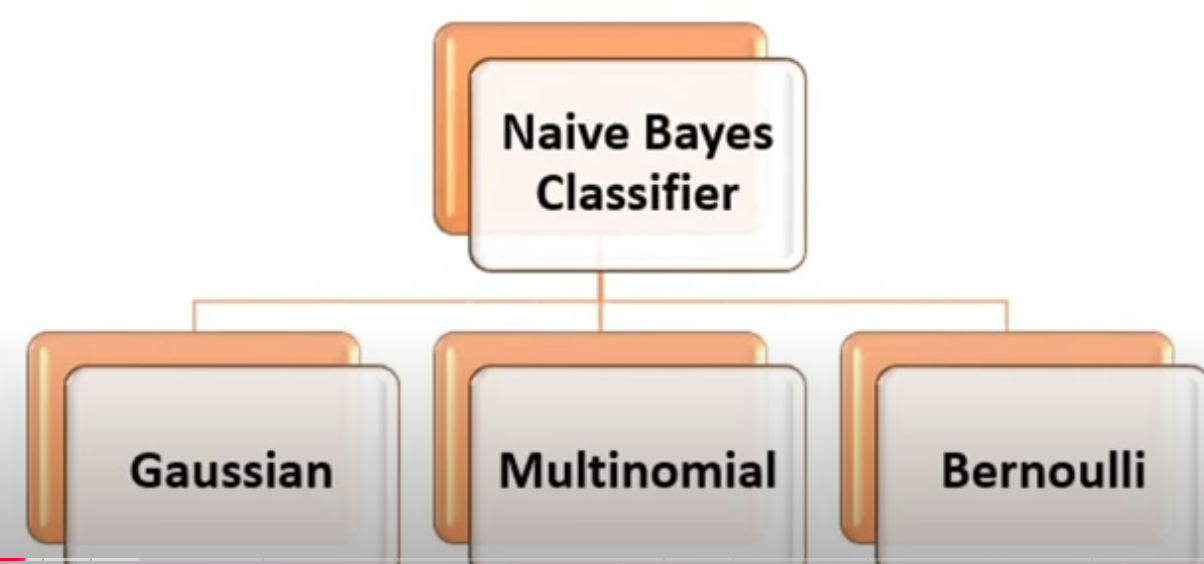

In [ ]:
import pandas as pd

df=pd.read_csv('Pearl_Jam_Tour2.csv')

In [ ]:
import pandas as pd
import random

# Olchamlari
cities = ["New York", "London", "Tokyo", "Sydney", "Paris"]
continents = ["North America", "Europe", "Asia", "Australia", "Europe"]
venue_capacities = [20000, 15000, 25000, 18000, 12000]
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Ma'lumotlar yaratish
random.seed(42)
data = []
for _ in range(42):
    city_index = random.randint(0, len(cities) - 1)
    data.append({
        "City": cities[city_index],
        "Continent": continents[city_index],
        "Venue Capacity": venue_capacities[city_index],
        "Day of Week": random.choice(days_of_week),
        "Multiple Concerts": random.choice([0, 1]),
        "Sold Out": random.choice([0, 1])
    })

# DataFrame yaratish
df = pd.DataFrame(data)

# String ustunlarni raqamli qiymatlarga o'zgartirish
city_mapping = {city: idx for idx, city in enumerate(cities)}
continent_mapping = {continent: idx for idx, continent in enumerate(set(continents))}
df["City"] = df["City"].map(city_mapping)
df["Continent"] = df["Continent"].map(continent_mapping)

print(df)

# Agar CSV formatda saqlashni xohlasangiz
df.to_csv("concert_dataset.csv", index=False)


    City  Continent  Venue Capacity Day of Week  Multiple Concerts  Sold Out
0      0          1           20000      Monday                  1         0
1      1          3           15000     Tuesday                  0         0
2      4          3           12000    Thursday                  0         0
3      0          1           20000     Tuesday                  0         0
4      4          3           12000     Tuesday                  1         0
5      3          0           18000      Friday                  1         0
6      1          3           15000    Saturday                  1         1
7      2          2           25000     Tuesday                  0         1
8      0          1           20000      Monday                  1         0
9      2          2           25000      Sunday                  1         1
10     0          1           20000    Saturday                  1         0
11     3          0           18000      Monday                  1         1

In [ ]:
df2=pd.get_dummies(df[['Continent','Day of Week']],dtype=int)

In [ ]:
df2

,Continent,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,1,0,1,0,0,0,0,0
1,3,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0
4,3,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0
6,3,0,0,1,0,0,0,0
7,2,0,0,0,0,0,1,0
8,1,0,1,0,0,0,0,0
9,2,0,0,0,1,0,0,0


In [ ]:
df3=pd.concat([df,df2],axis=1)

In [ ]:
df3

,City,Continent,Venue Capacity,Day of Week,Multiple Concerts,Sold Out,Continent,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,0,1,20000,Monday,1,0,1,0,1,0,0,0,0,0
1,1,3,15000,Tuesday,0,0,3,0,0,0,0,0,1,0
2,4,3,12000,Thursday,0,0,3,0,0,0,0,1,0,0
3,0,1,20000,Tuesday,0,0,1,0,0,0,0,0,1,0
4,4,3,12000,Tuesday,1,0,3,0,0,0,0,0,1,0
5,3,0,18000,Friday,1,0,0,1,0,0,0,0,0,0
6,1,3,15000,Saturday,1,1,3,0,0,1,0,0,0,0
7,2,2,25000,Tuesday,0,1,2,0,0,0,0,0,1,0
8,0,1,20000,Monday,1,0,1,0,1,0,0,0,0,0
9,2,2,25000,Sunday,1,1,2,0,0,0,1,0,0,0


In [ ]:
df4=df3.drop(['Continent','Day of Week'],axis=1)

In [ ]:
df4

,City,Venue Capacity,Multiple Concerts,Sold Out,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,0,20000,1,0,0,1,0,0,0,0,0
1,1,15000,0,0,0,0,0,0,0,1,0
2,4,12000,0,0,0,0,0,0,1,0,0
3,0,20000,0,0,0,0,0,0,0,1,0
4,4,12000,1,0,0,0,0,0,0,1,0
5,3,18000,1,0,1,0,0,0,0,0,0
6,1,15000,1,1,0,0,1,0,0,0,0
7,2,25000,0,1,0,0,0,0,0,1,0
8,0,20000,1,0,0,1,0,0,0,0,0
9,2,25000,1,1,0,0,0,1,0,0,0


In [ ]:
X=df4.drop(['Sold Out'],axis=1)

In [ ]:
y=df4['Sold Out']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.40      0.67      0.50         3

    accuracy                           0.56         9
   macro avg       0.57      0.58      0.55         9
weighted avg       0.63      0.56      0.57         9



In [ ]:
gnb.score(X_test,y_test)

0.5555555555555556

#add in parametr

In [ ]:
param_grid={
    'var_smoothing':[0.00000001,0.00000001,0.00000001]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search=GridSearchCV(estimator=gnb,param_grid=param_grid,scoring='accuracy',n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-08, 1e-08, 1e-08]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'var_smoothing': 1e-08}

In [ ]:
grid_search.best_score_

0.6666666666666667